### Student Information
Name:

Student ID:

GitHub ID:

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas.
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__.

### Second Phase Submission

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__.

# Phase 1

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


資料筆數： 847
標籤分布：
 label
 0.0    423
-1.0    315
 1.0    109
Name: count, dtype: int64
平均長度： 147.443919716647
最長文章長度： 2737
前五筆分詞：
0                                 [Calls, on, retards]
1    [Stunt, as, in, like, why, did, they, even, ma...
2          [Seeing, lots, of, red, in, the, ticker, .]
3    [Vision, Marine, Technologies, Inc., is, rewri...
4                 [He, didn, ’, t, say, thank, you, .]
Name: unigrams, dtype: object
詞彙總數： 4346
文件數量： 847


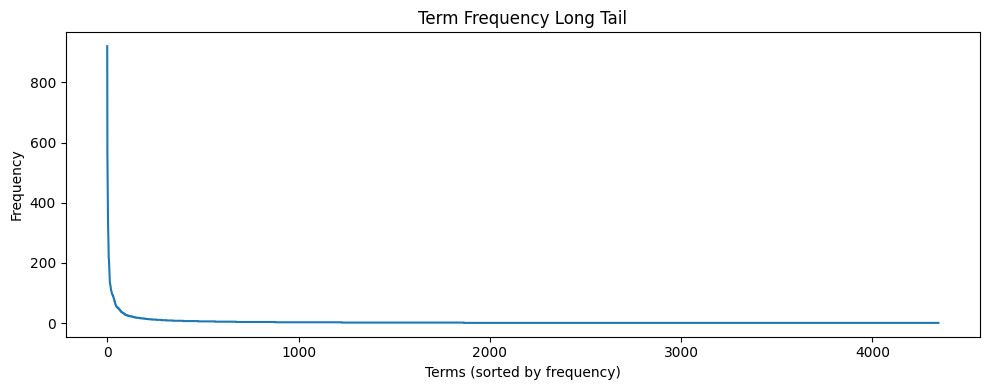

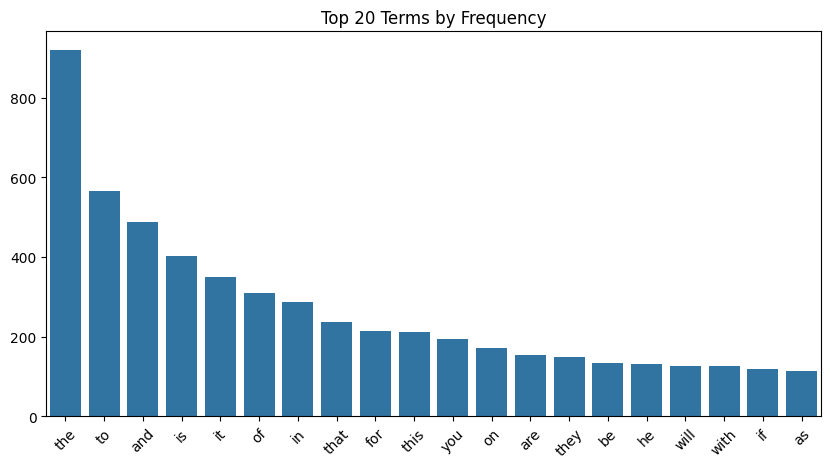

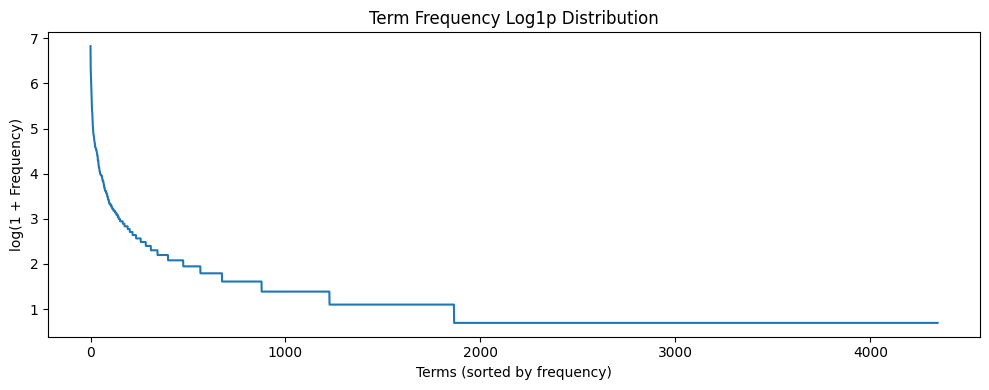

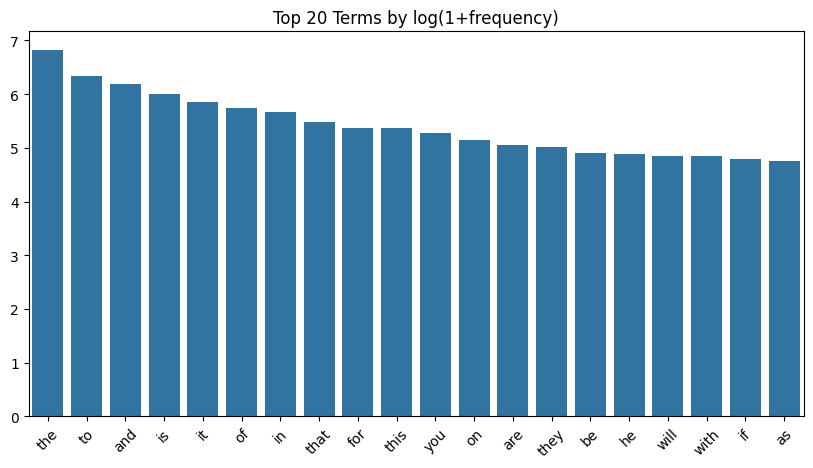

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")

df = pd.read_csv('/content/Reddit-stock-sentiment.csv')
df = df[['text', 'label']].copy()
df = df.dropna(subset=['text', 'label'])

print("資料筆數：", len(df))
print("標籤分布：\n", df['label'].value_counts())
df['text_length'] = df['text'].apply(lambda x: len(str(x)))
print("平均長度：", df['text_length'].mean())
print("最長文章長度：", df['text_length'].max())

df['unigrams'] = df['text'].apply(lambda x: word_tokenize(str(x)))
print("前五筆分詞：")
print(df['unigrams'].head())

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(df['text'])
print("詞彙總數：", len(count_vect.get_feature_names_out()))
print("文件數量：", X_counts.shape[0])

term_freq = np.asarray(X_counts.sum(axis=0)).ravel()
order = np.argsort(term_freq)[::-1]
sorted_freq = term_freq[order]
sorted_terms = count_vect.get_feature_names_out()[order]

plt.figure(figsize=(10, 4))
plt.plot(sorted_freq)
plt.title("Term Frequency Long Tail")
plt.xlabel("Terms (sorted by frequency)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

N = 20
plt.figure(figsize=(10, 5))
sns.barplot(x=sorted_terms[:N], y=sorted_freq[:N])
plt.title(f"Top {N} Terms by Frequency")
plt.xticks(rotation=45)
plt.show()

term_freq_log = np.log1p(sorted_freq)
plt.figure(figsize=(10, 4))
plt.plot(term_freq_log)
plt.title("Term Frequency Log1p Distribution")
plt.xlabel("Terms (sorted by frequency)")
plt.ylabel("log(1 + Frequency)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x=sorted_terms[:N], y=term_freq_log[:N])
plt.title(f"Top {N} Terms by log(1+frequency)")
plt.xticks(rotation=45)
plt.show()



=== BASIC INFO ===
Shape : (847, 8)
Columns: {'type': dtype('O'), 'subreddit': dtype('O'), 'upvotes': dtype('int64'), 'text': dtype('O'), 'subjectivity': dtype('float64'), 'polarity': dtype('float64'), 'sentiment': dtype('float64'), 'label': dtype('float64')}
      type       subreddit  upvotes  \
0  comment  wallstreetbets        0   
1  comment  wallstreetbets      -15   
2  comment     StockMarket        1   

                                                text  subjectivity  polarity  \
0                                   Calls on retards      1.000000 -0.900000   
1  Stunt as in like why did they even make a big ...      0.177778  0.083333   
2                  Seeing lots of red in the ticker.      0.000000  0.000000   

   sentiment  label  
0       -1.0   -1.0  
1        1.0    0.0  
2        0.0    0.0   

=== MISSING VALUES (per column) ===
type            0
subreddit       0
upvotes         0
text            0
subjectivity    0
polarity        0
sentiment       0
label    

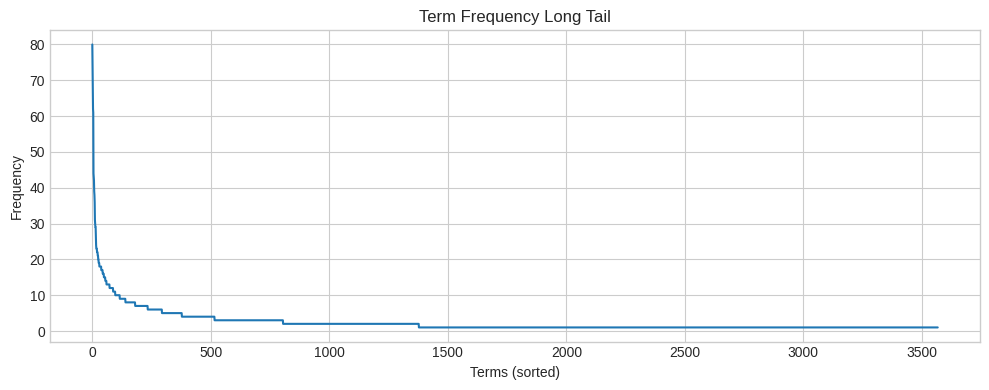

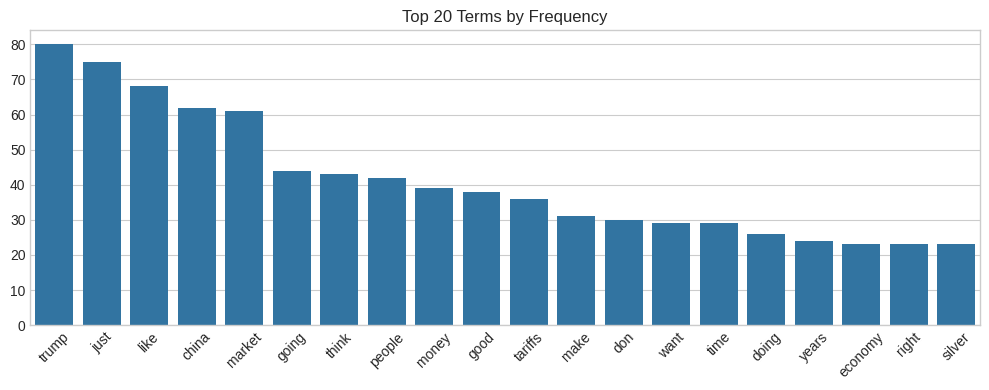

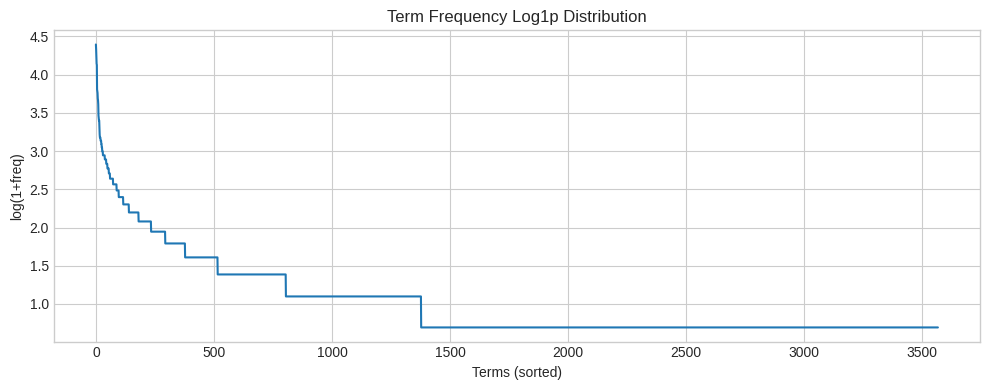

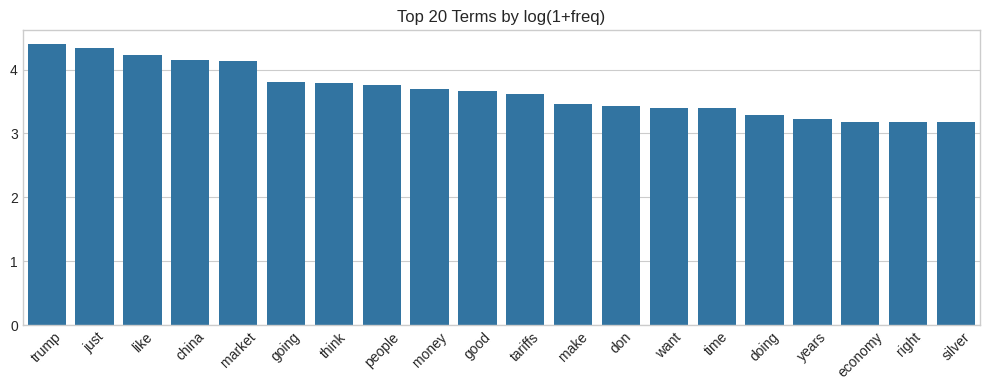


=== PHASE 1 COMPLETE ===


In [3]:
# reddit_phase1.py
# Phase 1 – DM2025 Lab 1 (Exercises 1-15)
# ======================================

import os, re, math, warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

warnings.filterwarnings("ignore")
plt.style.use("seaborn-v0_8-whitegrid")

# -------------------------------
# 1. Data Source
# -------------------------------
CSV_PATH = "/content/Reddit-stock-sentiment.csv"      # 修改路徑即可
df_raw = pd.read_csv(CSV_PATH, encoding="utf-8", low_memory=False)

# -------------------------------
# 2. Data Preparation
# -------------------------------
cols_keep = [
    "type", "subreddit", "upvotes",
    "text", "subjectivity", "polarity",
    "sentiment", "label"
]
df = df_raw[cols_keep].copy()

# cast numeric columns
df["upvotes"]      = pd.to_numeric(df["upvotes"], errors="coerce")
df["subjectivity"] = pd.to_numeric(df["subjectivity"], errors="coerce")
df["polarity"]     = pd.to_numeric(df["polarity"], errors="coerce")
df["sentiment"]    = pd.to_numeric(df["sentiment"], errors="coerce")
df["label"]        = pd.to_numeric(df["label"], errors="coerce")

# -------------------------------
# 3. Data Transformation
# 3.1 DataFrame already created
# 3.2 Familiarize with data
# -------------------------------
print("\n=== BASIC INFO ===")
print("Shape :", df.shape)
print("Columns:", df.dtypes.to_dict())
print(df.head(3), "\n")

# -------------------------------
# 4. Data Mining with Pandas
# 4.1 Missing values
# -------------------------------
print("=== MISSING VALUES (per column) ===")
missing_col = df.isnull().sum()
print(missing_col, "\n")

# 簡單策略：若 text 或 label 缺失直接丟棄
df.dropna(subset=["text", "label"], inplace=True)

# 其他欄位以中位 / 0 填補
df["upvotes"].fillna(0, inplace=True)
for col in ["subjectivity", "polarity", "sentiment"]:
    df[col].fillna(df[col].median(), inplace=True)

# 4.2 Duplicate records
dup_cnt = df.duplicated().sum()
print(f"Duplicates found: {dup_cnt}")
df.drop_duplicates(inplace=True)

# -------------------------------
# 5. Data Pre-processing
# 5.1 Sampling (random 80%)
# -------------------------------
df_sample = df.sample(frac=0.80, random_state=42).reset_index(drop=True)

# 5.2 Feature Creation
## 5.2.1 Text length
df_sample["text_len"] = df_sample["text"].str.len()

## 5.2.2 Regex tokenization (unigrams)
TOKEN_PATTERN = r"\b\w+\b"
df_sample["unigrams"] = df_sample["text"].apply(
    lambda x: re.findall(TOKEN_PATTERN, str(x).lower())
)

## 5.2.3 Upvote ratio (正規化)
max_up = df_sample["upvotes"].max()
df_sample["upvote_ratio"] = df_sample["upvotes"] / max_up

print("\n=== SAMPLE OVERVIEW ===")
print(df_sample.head(2)[["type","subreddit","upvotes","text_len","label"]])

# 5.3 Feature Subset Selection – CountVectorizer
vect = CountVectorizer(stop_words="english")
X_counts = vect.fit_transform(df_sample["text"])
print("\nVocab size :", len(vect.get_feature_names_out()))
print("Doc count  :", X_counts.shape[0])

# 5.4 Attribute Transformation / Aggregation
## 5.4.1 Term frequency (raw & log)
term_freq = np.asarray(X_counts.sum(axis=0)).ravel()
order = term_freq.argsort()[::-1]
terms_sorted = vect.get_feature_names_out()[order]
freq_sorted  = term_freq[order]
freq_log     = np.log1p(freq_sorted)

# -- Plot 1: Long-tail raw frequency
plt.figure(figsize=(10,4))
plt.plot(freq_sorted)
plt.title("Term Frequency Long Tail")
plt.xlabel("Terms (sorted)"); plt.ylabel("Frequency")
plt.tight_layout(); plt.show()

# -- Plot 2: Top-20 raw frequency
N = 20
plt.figure(figsize=(10,4))
sns.barplot(x=terms_sorted[:N], y=freq_sorted[:N])
plt.title(f"Top {N} Terms by Frequency")
plt.xticks(rotation=45); plt.tight_layout(); plt.show()

# -- Plot 3: Log-scaled distribution
plt.figure(figsize=(10,4))
plt.plot(freq_log)
plt.title("Term Frequency Log1p Distribution")
plt.xlabel("Terms (sorted)"); plt.ylabel("log(1+freq)")
plt.tight_layout(); plt.show()

# -- Plot 4: Top-20 log frequency
plt.figure(figsize=(10,4))
sns.barplot(x=terms_sorted[:N], y=freq_log[:N])
plt.title(f"Top {N} Terms by log(1+freq)")
plt.xticks(rotation=45); plt.tight_layout(); plt.show()

print("\n=== PHASE 1 COMPLETE ===")


# Phase 2

In [ ]:
### Begin Assignment Here